In [1]:
import collections
import inspect
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog
from graphiclog import utils, io, defaults

In [2]:
graphiclog.__file__, dir(graphiclog)

('/Users/zanejobe/opt/anaconda3/lib/python3.7/site-packages/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

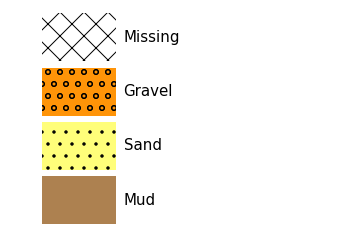

In [3]:
graphiclog.defaults.litholegend.plot()

# Load All Sequences

Here's a function (modified from `depstrat.data`) to load all the sequences as `BedSequence`s: 

In [4]:
# Set up some default args:

FPATH = '../data/AllBedsWithProfiles_CLEAN.csv'

# Columns to convert from strings to arrays
transforms = {c : utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}


# binary indicators
BINARY_FEATURES = ['snd', 'shl']


# bed data columns
FLOAT_FEATURES = [
    'th',
    'gs_tops_psi',
    'mean_gs_psi',
    'max_gs_psi',
    'grain_size_psi',
    'depth_m'
]

FEATURES = BINARY_FEATURES + FLOAT_FEATURES


# Sequence-level metadata
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum']


# Lithology component map
COMPONENT_MAP = ('mean_gs_psi', lambda gs: defaults.gs2litho(gs, units='psi'))

In [5]:
def load_sequences(
    fpath=FPATH,
    resample=None,
    depth_col='depth_m',
    features=FEATURES,
    metacols=METACOLS,
    min_length=3
):
    """
    Load the dataset from saved csv. Return list of BedSequences.
    """
    df = pd.read_csv(fpath, converters=transforms)

    bed_seqs = []
    for name, grp in df.groupby('count'):
        seq = graphiclog.BedSequence.from_dataframe(
                grp,
                topcol='tops',
                basecol='bases',
                component_map=COMPONENT_MAP,
                datacols=features,
                metacols=metacols
        )
        if len(seq) >= min_length:
            bed_seqs.append(seq)

    # resample arrays if you want
    for seq in bed_seqs:
        if resample is not None:
            seq.resample_data(depth_col, resample)

    return bed_seqs

In [6]:
sequences = load_sequences()

# Check out a sequence

In [7]:
for i in range(len(sequences)):
    print(i)
    print(sequences[i].metadata['name'])

0
Marnoso 1
1
Marnoso 3
2
Marnoso 4
3
Marnoso 6
4
Marnoso 7
5
Marnoso 8
6
Marnoso 9
7
Marnoso 10
8
Marnoso 11
9
Marnoso 12
10
Marnoso 14
11
Marnoso G16
12
Marnoso D19
13
Marnoso G20
14
Marnoso G21
15
Marnoso 23
16
Marnoso G24
17
Marnoso 26
18
Marnoso 33
19
Marnoso E35
20
Marnoso 37
21
Marnoso 39
22
Marnoso 40
23
Marnoso E41
24
Marnoso 42
25
Marnoso D44
26
Marnoso F45
27
Marnoso F46
28
Marnoso 48
29
Marnoso 50
30
Marnoso 55
31
Marnoso D57 and 47
32
Marnoso D58
33
Marnoso E59
34
Marnoso F60
35
Marnoso D61
36
Marnoso D62
37
Marnoso E63
38
Marnoso E64
39
Marnoso E66
40
Marnoso F70
41
Marnoso 71
42
Marnoso 74
43
Marnoso 75
44
Marnoso 76
45
Marnoso 77
46
Marnoso 78
47
Marnoso 83
48
Marnoso 84
49
Marnoso 85
50
Marnoso F87
51
Marnoso E88
52
Marnoso D89
53
Marnoso F90
54
Marnoso F92
55
Marnoso F93
56
Marnoso F95
57
Marnoso F96
58
Marnoso 100
59
Marnoso 101
60
Marnoso D103
61
Marnoso 104
62
Amazon 931B
63
Amazon 936A
64
Amazon 946A
65
Amazon 944A
66
Magellan 1320A
67
Grand 1
68
Grand 2
69
Grand 

In [59]:
#seq = random.choice(sequences) # pulls a random sequence
seq=sequences[267] # pulls a specific sequence (282 is cerro toro log)
seq

Striplog(353 Intervals, start=0.002623246345311081, stop=330.0)

In [60]:
seq.metadata['name']

'Sierra del Toro cc'

## There are issues with the 'missing' lithology - see example below
These beds are being called mud but should be missing. I thought when I exported from Matlab there were NaNs for the grain size, but I just checked and they have grain size values. However, tehre is a column called "missing_tops" that is a boolean, and it is correct. I can't find where the lithology is set, can you help with that? 

In [61]:
# THESE BEDS SHOULD BE MISSING!!
seq[220]
seq[215]

Interval({'data': {'snd': 0.0, 'shl': 1.0, 'th': 7.20304771282812, 'gs_tops_psi': -5.9658, 'mean_gs_psi': -5.9658, 'max_gs_psi': -5.9658, 'grain_size_psi': array([-5.9658, -5.9658]), 'depth_m': array([199.24255465, 192.03950693])}, 'top': Position({'middle': 199.242554645156, 'units': 'm'}), 'base': Position({'middle': 192.03950693232787, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'mud'})]})

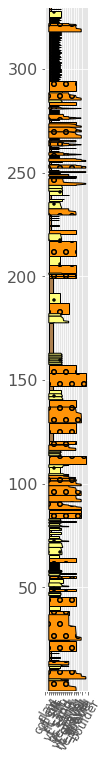

In [62]:
seq.plot(legend=defaults.litholegend, width_field='grain_size_psi', fig_width=1)

# OK now some stats

# Mean and Max grain size in each bed

In [63]:
i=-1
seq[i]

Interval({'data': {'snd': 1.0, 'shl': -0.0, 'th': 4.91637931617305, 'gs_tops_psi': -0.8294, 'mean_gs_psi': 3.8761, 'max_gs_psi': 5.247999999999999, 'grain_size_psi': array([-0.8293,  1.6512,  1.6633,  1.6926,  1.7219,  1.7438,  5.0823,
        5.1797,  5.248 ,  5.248 ,  5.248 ]), 'depth_m': array([4.9190e+00, 4.8698e+00, 4.5609e+00, 3.7252e+00, 2.8474e+00,
       2.1591e+00, 1.3305e+00, 5.9310e-01, 1.0860e-01, 5.2400e-02,
       2.6000e-03])}, 'top': Position({'middle': 4.9190025625183615, 'units': 'm'}), 'base': Position({'middle': 0.002623246345311081, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'gravel'})]})

In [64]:
print('gs array gs', seq[i].data['grain_size_psi'])
print('gs array depth', seq[i].data['depth_m'])

gs array gs [-0.8293  1.6512  1.6633  1.6926  1.7219  1.7438  5.0823  5.1797  5.248
  5.248   5.248 ]
gs array depth [4.9190e+00 4.8698e+00 4.5609e+00 3.7252e+00 2.8474e+00 2.1591e+00
 1.3305e+00 5.9310e-01 1.0860e-01 5.2400e-02 2.6000e-03]


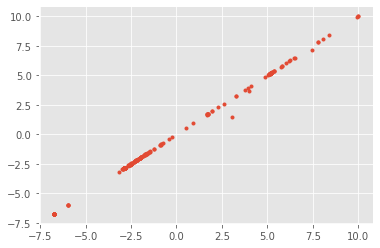

In [65]:
avg=[]
mean=[]

for beds in seq:
    avgx=np.average(beds.data['grain_size_psi'], weights=beds.data['depth_m'])
    avg.append(avgx)
    
    meanx=np.mean(beds.data['grain_size_psi'])
    mean.append(meanx)

avg=np.array(avg)
mean=np.array(mean)
plt.plot(mean,avg,'.') # not as different as I thought they would be...

In [66]:
print('weighted mean', np.average(seq[i].data['grain_size_psi'], weights=seq[i].data['depth_m']))
print('arithmetic mean', np.mean(seq[i].data['grain_size_psi']))
print('weighted mean from matlab', seq[i].data['mean_gs_psi'])
print('WHY SO DIFFERENT?')

print(' ')

print('max gs', np.amax(seq[i].data['grain_size_psi']))

weighted mean 1.4785778791827913
arithmetic mean 3.059045454545455
weighted mean from matlab 3.8761
WHY SO DIFFERENT?
 
max gs 5.248


In [67]:
bed=seq[0]

In [56]:
bed.get_values('depth_m')

array([[ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.2042],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.0991],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.0991],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.1342],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.0991],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.0991],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -3.028 ],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -2.2163],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 , -1.0523],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 ,  1.7306],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 ,  5.3741],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 ,  7.814 ],
       [ 1.    , -0.    , -3.2043,  3.776 ,  7.814 ,  7.814 ]])

# net to gross

In [68]:
th = seq.get_field('th')
maxgs = seq.get_field('max_gs_psi')

sandth = th[maxgs>-4]
mudth = th[maxgs<=-4]
totalth = np.sum(seq.get_field('th'))

print('Should be zero:', totalth-(np.sum(sandth)+np.sum(mudth)))
print('why is there this rounding error sometimes? (found it using sequences[282])')

Should be zero: 0.0
why is there this rounding error sometimes? (found it using sequences[282])


In [69]:
ng=np.sum(sandth)/totalth
ng

0.7648635574524653